# <center> **Spatial Filters**

## **1. Importing data from Google Drive**

In [1]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [3]:
%cd Filtro Espaciais

/content/drive/MyDrive/Processamento Digital de Imagem/Filtro Espaciais


## **2. Importing necessary libraries**

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
# Now after we have imported all necessary libraries, we'll be importing the image that will be used in this problem #
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', cv.COLOR_BGR2RGB)

# Showing the image in a new tab #
cv.imshow('Jabami Yumeko', img)

# necessary code to avoid the python's kernel to crash #
cv.waitKey(0)
cv.destroyAllWindows()

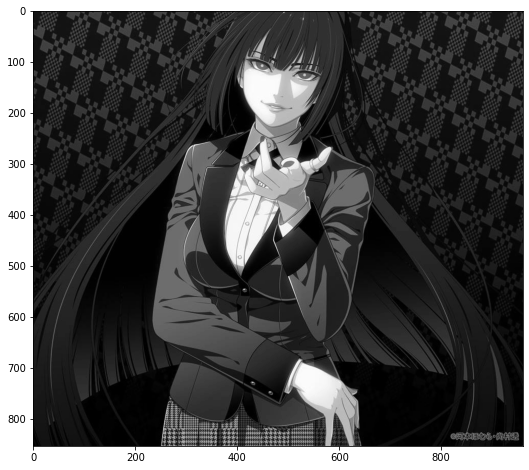

In [5]:
# ploting image #
plt.subplots(figsize=(15, 8))

# Lendo a imagem #
img = Image.open('images/umeko.jpg').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)
# Plotando a imagem #
plt.imshow(img, cmap = 'gray')
plt.show()

## **3. Applying a simple mean filter with OpenCV**

(853, 960)


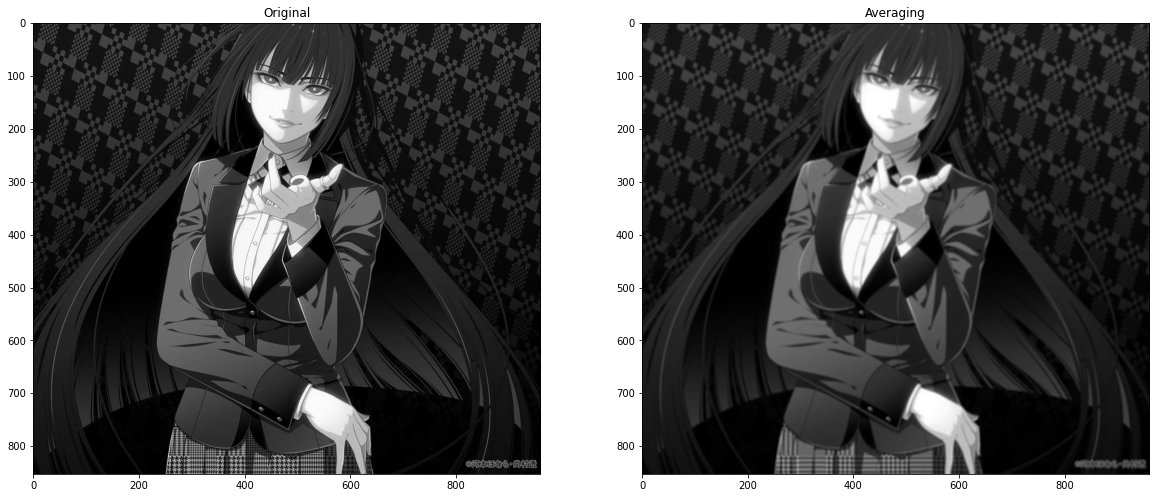

In [ ]:
# Lendo a imagem #
img = Image.open('images/umeko.jpg').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)
print(img.shape)
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

f, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(dst, cmap = 'gray')
ax[1].set_title('Averaging')
plt.show()

## **4. Implementing 2D Convolution**

### **4.1 Auxiliar functions**

In [7]:
# Padding #
def addPadding(img, size):
    
    img_ = np.zeros((img.shape[0] + (size * 2), img.shape[1] + (size * 2)), np.uint8)
    
    img_[size:-size, size:-size] = img
    
    return img_

In [8]:
# Crop #
def cropImage(img, size):
    
    img_ = np.zeros((img.shape[0] - (size * 2), img.shape[1] - (size * 2)), np.uint8)
    
    img_ = img[size:-size, size:-size]
    
    return img_

### **4.2 Convolution function**

In [9]:
def conv2D(img, kernel):
    
    if(kernel.shape[0] != kernel.shape[1]):
        print("Wrong Size! number of rows and columns must be equal!")
        return None
        
    img_copy = img.copy()
    kernel = np.flipud(np.fliplr(kernel))
    img_copy = addPadding(img_copy, kernel.shape[0]) # Adding Padding #

    final = np.zeros((img_copy.shape[0], img_copy.shape[1]), np.uint8)
    
    for row in range(0, final.shape[0]):
        if(row > final.shape[0] - kernel.shape[0]):
            break
        for col in range(0, final.shape[1]):
            
            if(col > final.shape[1] - kernel.shape[0]):
                break
            
            # Flatten #
            i = kernel #.flatten()
            j = img_copy[row:row + kernel.shape[0], col:col + kernel.shape[0]] #.flatten()
            #print("kernel: {}\nh: {}\nmultiply: {}\nSum: {}".format(i, j, np.multiply(i, j), np.multiply(i, j).sum()))
            
            # Multiply and Sum #
           # final[row, col] = np.multiply(i, j).sum()
            final[row, col] = (i * j).sum()
    
    final = cropImage(final, kernel.shape[0])
    
    return final

### **4.3 Kernels**

In [10]:
# Kernels #

blur = np.ones((5,5),np.float32)/25
edge_detection = np.array([[-1, -1, -1], [-1, 2, -1], [-1, -1, -1]])
laplace = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
horizontal = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gauss = np.array([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])

### **4.4 Applying mean kernel**

In [ ]:
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', 0)
img_ = conv2D(img, blur)

cv.imwrite("images/blur_yumeko.png", img_)

In [ ]:
# Showing the image in a new tab #
cv.imshow('Jabami Yumeko', img)
cv.imshow('Jabami Yumeko with Filter', img_)

# necessary code to avoid the python's kernel to crash #
cv.waitKey(0)
cv.destroyAllWindows()

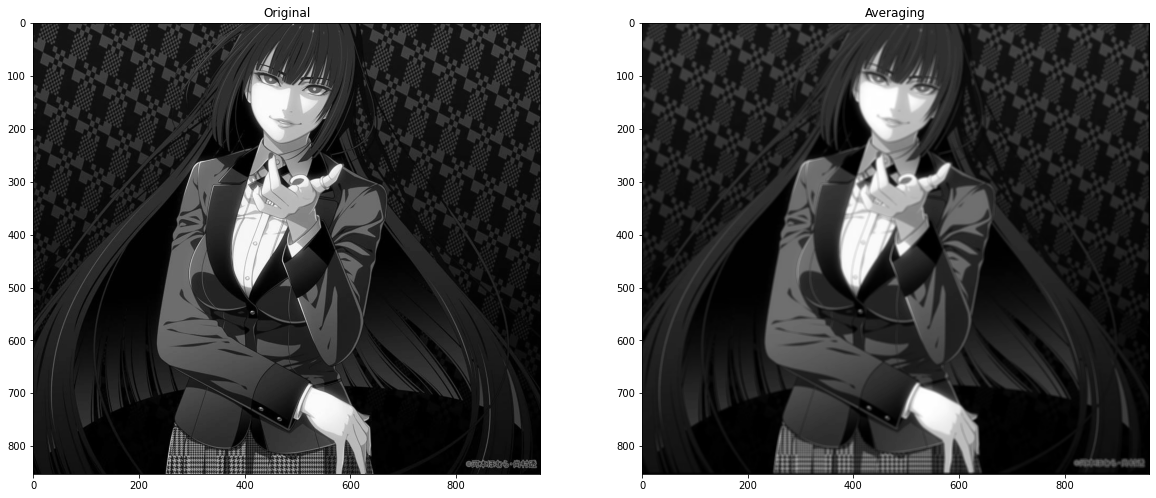

In [ ]:
# Lendo a imagem #
img = Image.open('images/umeko.jpg').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)
img_blur = Image.open('images/blur_yumeko.png').convert("L")  # for RGB images, need to convert #
img_blur = np.asarray(img_blur)

f, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(img_, cmap = 'gray')
ax[1].set_title('Averaging')
plt.show()

### **4.5 Applying Gaussian + Laplacian filters**

In [19]:
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', 0)

img_ = conv2D(img, gauss)
img_ = conv2D(img_, laplace)

cv.imwrite("images/gauss+laplace_yumeko.png", img_)

True

In [ ]:
# Showing the image in a new tab #
cv.imshow('Jabami Yumeko', img)
cv.imshow('Jabami Yumeko with Filter', img_)

# necessary code to avoid the python's kernel to crash #
cv.waitKey(0)
cv.destroyAllWindows()

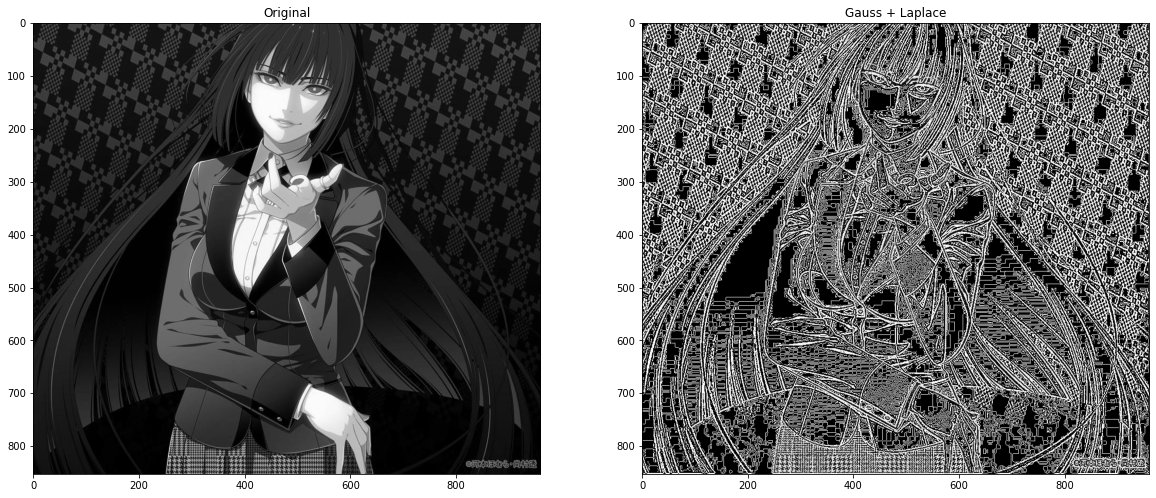

In [20]:
# Lendo a imagem #
img = Image.open('images/umeko.jpg').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)
img_blur = Image.open('images/gauss+laplace_yumeko.png').convert("L")  # for RGB images, need to convert #
img_blur = np.asarray(img_blur)

f, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(img_blur, cmap = 'gray')
ax[1].set_title('Gauss + Laplace')
plt.show()

### **4.6 Comparing Gauss+Laplacian vs Laplacian**

O filtro Laplaciano é um tipo de filtro, que pelo fato de ser um filtro aguçante, ele tende a aumentar as falhas existentes na imagem que é o que pode ser observado na figura da esquerda. Por outro lado quando aplicado o filtro gaussiano, que é um filtro de suvização, ele tente a diminuir as falhas da imagem, e em consequência disso, ao aplicar o filtro Laplaciano é possivel observar melhor as bordas da imagem.

In [21]:
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', 0)

img_ = conv2D(img, laplace)

cv.imwrite("images/laplace_yumeko.png", img_)

True

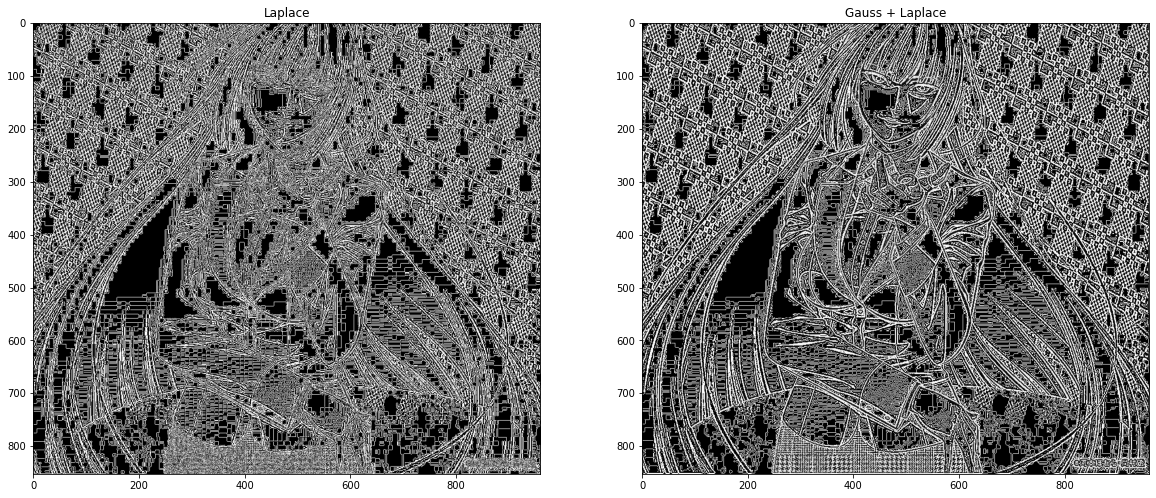

In [22]:
# Lendo a imagem #
img = Image.open('images/laplace_yumeko.png').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)
img_blur = Image.open('images/gauss+laplace_yumeko.png').convert("L")  # for RGB images, need to convert #
img_blur = np.asarray(img_blur)

f, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Laplace')
ax[1].imshow(img_blur, cmap = 'gray')
ax[1].set_title('Gauss + Laplace')
plt.show()